# **Executive Summary**

**Project Overview:**
The aim of the project is to use Machine Learning models to predict the user ratings for a movie that the user watched. We have been provided with the movies dataset which had list of titles along with the genre, a ratings dataset which had userid and ratings for a particular movieid. These two dataset were combined for the purpose of the project.

The following is the brief summary of the work:

**1) Concatenating the Datasets:** The movie ratings dataset contained the information about userid, movieid and user ratings. The movies dataset had movieid, titles, and genre which were combined into one dataset.

**2) Data Pre-Processing:** Performing feature engineering to create new set of feature `year_released`. Segregating the `genres` column into encoded columns of `genre`. Using NLP techniques like `tokenization` and `Word2Vec Embedding` to convert the `title` into vectors (set of numbers that ML models can interpret). There were some missing values in the vectors which were removed from the set of vectors. The dimesions of the Vectors obtained were reduced to `2 dimensions` using PCA, initially there were vectors of `100 dimensions`. These vectors obtained after applying PCA were merged into the main dataset. Finally the dataset was one-hot encoded to convert the categorical features into numerical features.

**3) Model Training:** Before training the model the dataset was split into train set and test set before actually training the model for the purpose of validation of results using the validation set of data. The model was trained using `Linear Regression`, `Random Forest Regression`, and `Artificial Neural Network(ANN) Regression`.

**Results on Validation Set:**

* **Linear Regression:** `0.8411`
* **ANN Regression**: `0.8125`

**4) Predictions on Final Prediction Set for Leaderboard:**

A function for rounding-off was created to round-off the results for the leaderboard. Then following results were obtained from the leaderboard.

* **Linear Regression:**`89`
* **ANN Regression:**`88`
* **Random Forest Regression:**`93`

In conclusion, the best result was obtained using the `Artificial Neural Network`. Hence, that is the best model we have obtained through our project. But, considering the results of `Linear Regression` it is more suitable model because of simiplicity, and results obtained by `ANN` and `Linear Regression` being too close.

Importing the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **1. Concatenating the given Datasets**

Combining given datasets to have the information and features in one dataset

Loading the test and train data that was obtained by combining `movies.csv`,  `movie_ratings_train.csv`, and `movie_ratings_test.csv`.

Loading the datasets

In [ ]:
df_movies = pd.read_csv('/content/drive/MyDrive/DATA6100/movies.csv')
df_ratings_train = pd.read_csv('/content/drive/MyDrive/DATA6100/movie_ratings_train.csv')
df_ratings_test = pd.read_csv('/content/drive/MyDrive/DATA6100/movie_ratings_test.csv')

Using Left join to merge `movie_ratings_train.csv` and `movies.csv`

In [ ]:
df_train = df_ratings_train.merge(df_movies,on='movieId',how='left')

Using Left join to merge `movie_ratings_test.csv` and `movies.csv`

In [ ]:
df_test = df_ratings_test.merge(df_movies,on='movieId',how='left')

Converting the `df_train` into a new csv file `ratings_train.csv`

In [ ]:
df_train.to_csv('ratings_train.csv', index = False, encoding='utf-8')

Converting the `df_test` into a new csv file `ratings_test.csv`

In [ ]:
df_test.to_csv('ratings_test.csv', index = False, encoding='utf-8')

## **2.Data Pre-Processing**

Data preprocessing is cleaning, transforming and combining the raw data to make it ready for analysis and predictions. The main objective is to improve the quality of data and to make it more convenient for data mining.

The most common steps which are performed during data preprocessing are:
* Data Cleaning
* Data Reduction
* Handling Missing Data
* Feature Engineering


Therefore, the flow which we followed in data pre-processing is:
* Imported the libraries
* Loaded the data sets
* Concatenated datasets
* Performed feature Engineering
* Performed the pre-processing of text data using NLP techniques like tokenizations.
* Performed Word2Vec Embedding technique to convert text data into vector.
* Dropped unwanted columns
* Performed Dimensionality Reduction
* Performed Data Visualization
* Lastly, merged the word embeddings into the actual dataset for training the model.

Further, performed one-hot encoding, essentially the most important part for data pre-processing.

**One-hot encoding:** A technique that we use to represent categorical variables as numerical values in a machine learning model.

Finally, separated train and test datasets again.

In [ ]:
df_ratings_train = pd.read_csv('/content/drive/MyDrive/DATA6100/ratings_train.csv')
df_ratings_test = pd.read_csv('/content/drive/MyDrive/DATA6100/ratings_test.csv')

In [ ]:
#Training dataset
df_ratings_train.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
#Testing dataset
df_ratings_test.head()

,userId,movieId,timestamp,title,genres
0,1,349,964982563,Clear and Present Danger (1994),Action|Crime|Drama|Thriller
1,1,592,964982271,Batman (1989),Action|Crime|Thriller
2,1,780,964984086,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
3,1,1196,964981827,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
4,1,1208,964983250,Apocalypse Now (1979),Action|Drama|War


Dropping `timestamp` column as there is no use of this column

In [ ]:
df_ratings_train = df_ratings_train.drop(['timestamp'],axis=1)
df_ratings_test = df_ratings_test.drop(['timestamp'],axis=1)

In [ ]:
#Shapes of the train and test dataset
df_ratings_train.shape,df_ratings_test.shape

((90836, 5), (10000, 4))

In [ ]:
#Separating the target and input features
y = df_ratings_train['rating']
df_ratings_train = df_ratings_train.drop(['rating'],axis=1)

Concatenating `training` and `testing` dataset for easier preprocessing

In [ ]:
df = pd.concat([df_ratings_train,df_ratings_test])

In [ ]:
df

,userId,movieId,title,genres
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,Grumpier Old Men (1995),Comedy|Romance
2,1,6,Heat (1995),Action|Crime|Thriller
3,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...
9995,610,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX
9996,610,87232,X-Men: First Class (2011),Action|Adventure|Sci-Fi|Thriller|War
9997,610,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller
9998,610,91658,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller


### **Feature Engineering**

Creating a new feature `year_released` using the information in the `title`

In [ ]:
#Appending the titles from the dataframe into a list
movie_list = list(df['title'])

In [ ]:
#Number of entries in the list
len(movie_list)

100836

In [ ]:
#List to store year_released
ls = []

#List to store the title after striping the year information
title = []

#Using the loop to store the year_released into the list
for i in movie_list:
  temp = i.split()

  #appending the year information
  ls.append(temp[-1].strip('( )'))
  temp.pop(-1)

  #appending the title without year information
  title.append(' '.join(temp))

In [ ]:
len(title)

100836

Storing the year information in the dataframe as `year_released`

In [ ]:
df['year_released'] = ls

Storing the title without the year information back into the `title`

In [ ]:
df['title'] = title

In [ ]:
df.shape

(100836, 5)

In [ ]:
df.head(10)

,userId,movieId,title,genres,year_released
0,1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,Grumpier Old Men,Comedy|Romance,1995
2,1,6,Heat,Action|Crime|Thriller,1995
3,1,47,Seven (a.k.a. Se7en),Mystery|Thriller,1995
4,1,50,"Usual Suspects, The",Crime|Mystery|Thriller,1995
5,1,70,From Dusk Till Dawn,Action|Comedy|Horror|Thriller,1996
6,1,101,Bottle Rocket,Adventure|Comedy|Crime|Romance,1996
7,1,110,Braveheart,Action|Drama|War,1995
8,1,151,Rob Roy,Action|Drama|Romance|War,1995
9,1,157,Canadian Bacon,Comedy|War,1995


Encoding the `genres` column

In [ ]:
#We have 951 unique rows in `genres` column
df['genres'].value_counts()

Comedy                                                      7196
Drama                                                       6291
Comedy|Romance                                              3967
Comedy|Drama|Romance                                        3000
Comedy|Drama                                                2851
                                                            ... 
Comedy|Crime|Drama|Western                                     1
Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi       1
Children|Fantasy|Musical|Romance                               1
Comedy|Crime|Drama|Horror                                      1
Action|Crime|Drama|Sci-Fi                                      1
Name: genres, Length: 951, dtype: int64

In [ ]:
#Each row in `genres` can split into list of genres
df['genres'].iloc[0].split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

We used a list to get the list of genres from `genres` column then further used a set to get unique set of genres for the movies.

In [ ]:
l = []
for i in range(len(df['genres'])):
  for genre in df['genres'].iloc[i].split('|'):
    l.append(genre)

In [ ]:
#Using set to get a unique list of genres
unique_list = list(set(l))

In [ ]:
unique_list

['Film-Noir',
 'Action',
 'Documentary',
 'War',
 'Animation',
 'Comedy',
 'Musical',
 '(no genres listed)',
 'Fantasy',
 'Thriller',
 'Horror',
 'Drama',
 'Children',
 'IMAX',
 'Mystery',
 'Western',
 'Romance',
 'Sci-Fi',
 'Adventure',
 'Crime']

`count_genre function` was created to get count of each kind of genre so that it can be used for the visualization of various kinds of genres that users have watched.

In [ ]:
def count_genre(genre):
  count = 0
  for i in range(len(df['genres'])):
    if genre in df['genres'].iloc[i]:
      count+=1
  return genre,count

In [ ]:
count = count_genre('Romance')

In [ ]:
count

('Romance', 18124)

Using the `count_genre function` to store the count of each genre into `genre_count dataframe`

In [ ]:
#intializing `genre_count` dataframe
genre_count = pd.DataFrame(columns=['genre','count'])
for i in range(len(unique_list)):
  genre_count.loc[i] = count_genre(unique_list[i])

In [ ]:
#Sorting `genre_count` in descending order
genre_count.sort_values(by=['count'],ascending=False,inplace=True)

In [ ]:
genre_count

,genre,count
11,Drama,41928
5,Comedy,39053
1,Action,30635
9,Thriller,26452
18,Adventure,24161
16,Romance,18124
17,Sci-Fi,17243
19,Crime,16681
8,Fantasy,11834
12,Children,9208


Visualizing the genre count for each genre using the `bar plot`

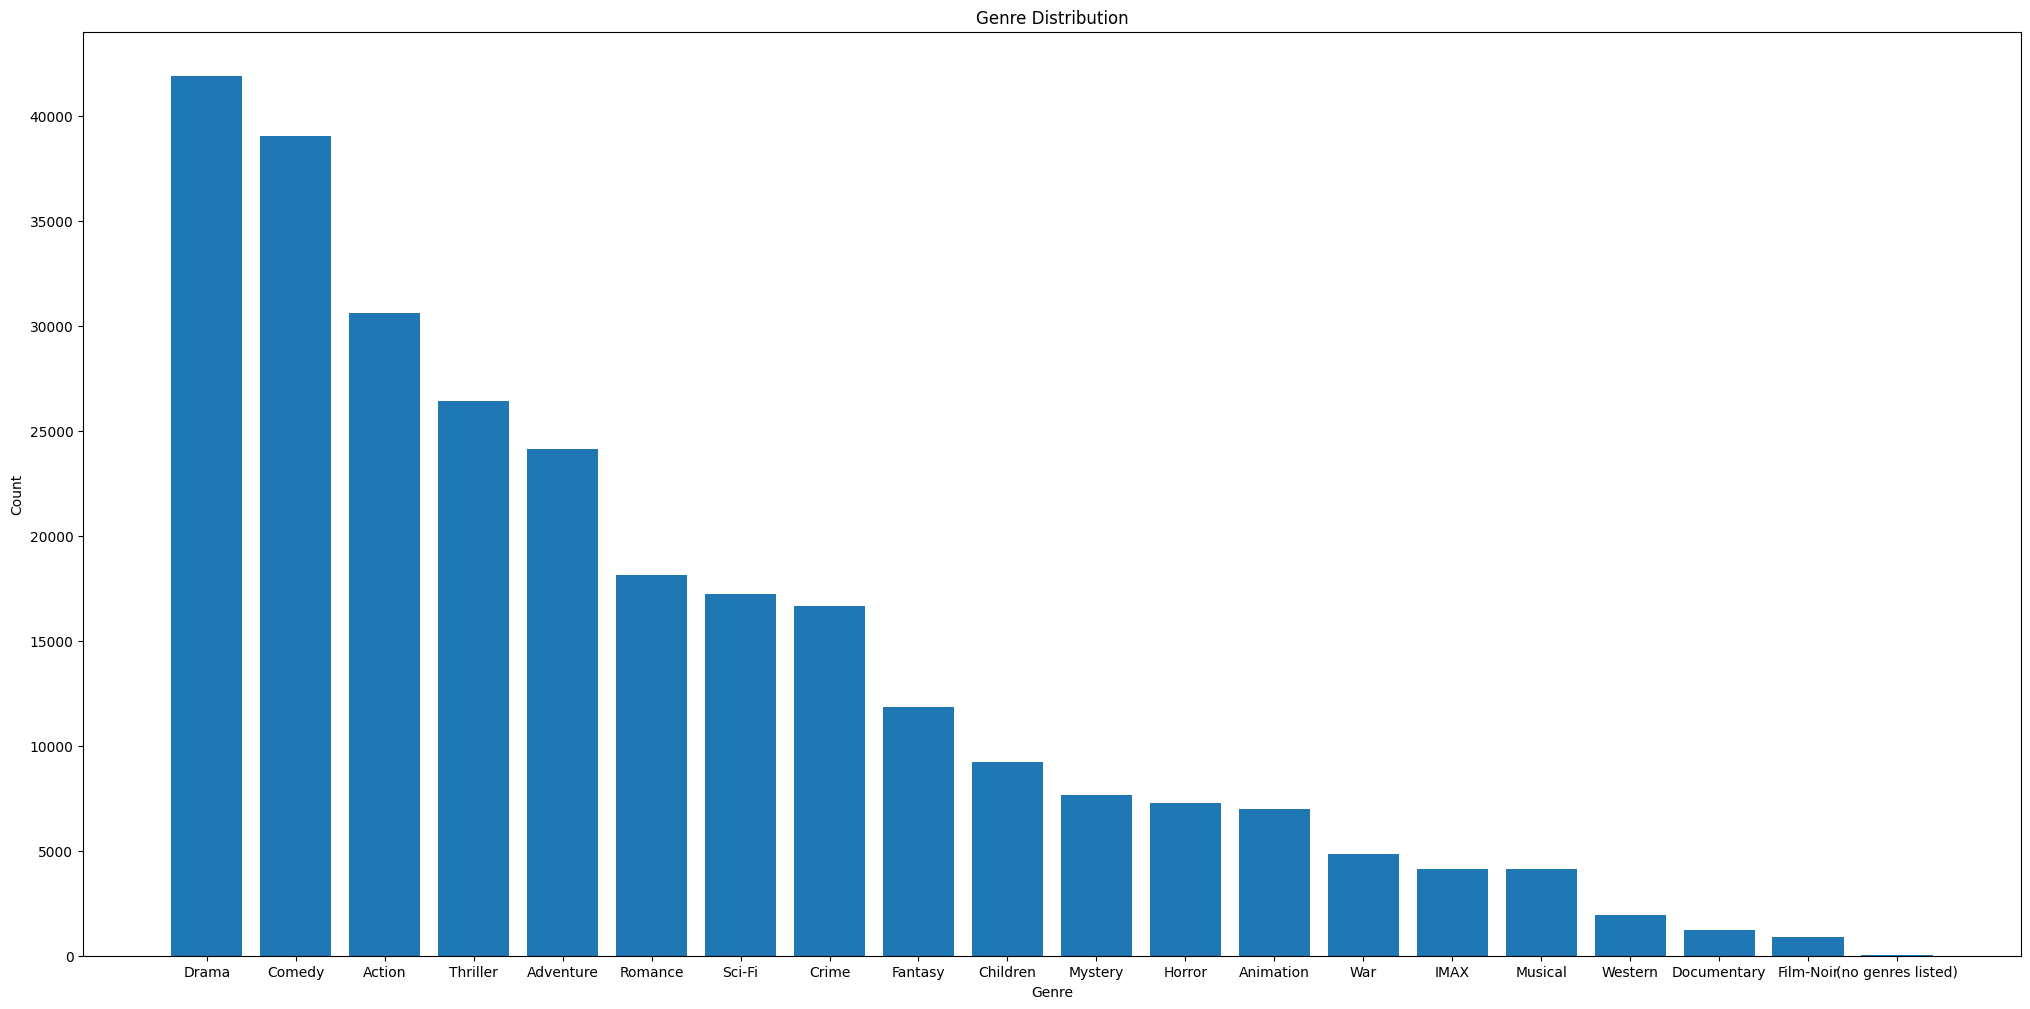

In [ ]:
plt.figure(figsize=(25,12))
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.bar(genre_count['genre'],genre_count['count'])
plt.show()

`genre_encode function` takes the `genre` as the parameter and checks for the genre in a particular row and appends the output into a list. This list is returned by the function.

In [ ]:
# Returns the list that contains info about the particular genre, if present '1' is appended, else '0' is appended into the list.
def genre_encode(genre):
  l = []
  for i in range(len(df['genres'])):
    if genre in df['genres'].iloc[i]:
      l.append(1)
    else:
      l.append(0)
  return l

In [ ]:
# Looping through the unique list of genre and encoding it using the function defined earlier
for genre in unique_list:
  df[genre] = genre_encode(genre)

In [ ]:
df.head()

,userId,movieId,title,genres,year_released,Film-Noir,Action,Documentary,War,Animation,...,Horror,Drama,Children,IMAX,Mystery,Western,Romance,Sci-Fi,Adventure,Crime
0,1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,1,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,6,Heat,Action|Crime|Thriller,1995,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,47,Seven (a.k.a. Se7en),Mystery|Thriller,1995,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,50,"Usual Suspects, The",Crime|Mystery|Thriller,1995,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Value Counts for each genre

In [ ]:
for genre in unique_list:
  print(df[genre].value_counts())

0    99966
1      870
Name: Film-Noir, dtype: int64
0    70201
1    30635
Name: Action, dtype: int64
0    99617
1     1219
Name: Documentary, dtype: int64
0    95977
1     4859
Name: War, dtype: int64
0    93848
1     6988
Name: Animation, dtype: int64
0    61783
1    39053
Name: Comedy, dtype: int64
0    96698
1     4138
Name: Musical, dtype: int64
0    100789
1        47
Name: (no genres listed), dtype: int64
0    89002
1    11834
Name: Fantasy, dtype: int64
0    74384
1    26452
Name: Thriller, dtype: int64
0    93545
1     7291
Name: Horror, dtype: int64
0    58908
1    41928
Name: Drama, dtype: int64
0    91628
1     9208
Name: Children, dtype: int64
0    96691
1     4145
Name: IMAX, dtype: int64
0    93162
1     7674
Name: Mystery, dtype: int64
0    98906
1     1930
Name: Western, dtype: int64
0    82712
1    18124
Name: Romance, dtype: int64
0    83593
1    17243
Name: Sci-Fi, dtype: int64
0    76675
1    24161
Name: Adventure, dtype: int64
0    84155
1    16681
Name: Crime, dty

In [ ]:
#Dropping the genres columns as we have already encoded the genres column
df = df.drop(['genres'],axis=1)

In [ ]:
df.head()

,userId,movieId,title,year_released,Film-Noir,Action,Documentary,War,Animation,Comedy,...,Horror,Drama,Children,IMAX,Mystery,Western,Romance,Sci-Fi,Adventure,Crime
0,1,1,Toy Story,1995,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,1,3,Grumpier Old Men,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,6,Heat,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,47,Seven (a.k.a. Se7en),1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,50,"Usual Suspects, The",1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
#Value count for the `UserId`
df['userId'].value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

In [ ]:
#List of unique years of movie release
years = list(df['year_released'].unique())
years

['1995',
 '1996',
 '1994',
 '1977',
 '1993',
 '1990',
 '1991',
 '1940',
 '1939',
 '1941',
 '1938',
 '1947',
 '1975',
 '1968',
 '1945',
 '1963',
 '1971',
 '1951',
 '1979',
 '1992',
 '1986',
 '1982',
 '1989',
 '1987',
 '1981',
 '1983',
 '1960',
 '1980',
 '1952',
 '1984',
 '1933',
 '1985',
 '1974',
 '1922',
 '1997',
 '1998',
 '1930',
 '1942',
 '1967',
 '1959',
 '1946',
 '1978',
 '1973',
 '1988',
 '1999',
 '1976',
 '1931',
 '1964',
 '1962',
 '1965',
 '1969',
 '2000',
 '1970',
 '2003',
 '2004',
 '2006',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '1955',
 '2002',
 '1961',
 '1954',
 '1957',
 '1943',
 '1956',
 '1966',
 '2001',
 '1937',
 '1972',
 '2005',
 '1950',
 '2007',
 '2016',
 '1926',
 '1944',
 '1949',
 '1936',
 '2017',
 '1958',
 '1935',
 '1927',
 '1953',
 '2018',
 '1923',
 '1902',
 '1920',
 '1948',
 '1928',
 'Mirror',
 '1934',
 '1916',
 '1908',
 '1932',
 '1921',
 '1925',
 '1929',
 '1917',
 'Watson',
 '2006–2007',
 'Baby',
 '2',
 '1915',
 '1924',
 '1903',
 'On

Using Regular Expressions to the `year_release` column and replacing the values which don't match the year pattern with `Not Known` status

In [ ]:
import re
for i in range(len(df['year_released'])):
  match = re.match(r'.*([1-3][0-9]{3})', df['year_released'].iloc[i])
  if match == None:
    df['year_released'].iloc[i] = 'Unknown'

<ipython-input-44-f06823fa742a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_released'].iloc[i] = 'Unknown'


List of years after updating using regex

In [ ]:
years_updated = list(df['year_released'].unique())
years_updated

['1995',
 '1996',
 '1994',
 '1977',
 '1993',
 '1990',
 '1991',
 '1940',
 '1939',
 '1941',
 '1938',
 '1947',
 '1975',
 '1968',
 '1945',
 '1963',
 '1971',
 '1951',
 '1979',
 '1992',
 '1986',
 '1982',
 '1989',
 '1987',
 '1981',
 '1983',
 '1960',
 '1980',
 '1952',
 '1984',
 '1933',
 '1985',
 '1974',
 '1922',
 '1997',
 '1998',
 '1930',
 '1942',
 '1967',
 '1959',
 '1946',
 '1978',
 '1973',
 '1988',
 '1999',
 '1976',
 '1931',
 '1964',
 '1962',
 '1965',
 '1969',
 '2000',
 '1970',
 '2003',
 '2004',
 '2006',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '1955',
 '2002',
 '1961',
 '1954',
 '1957',
 '1943',
 '1956',
 '1966',
 '2001',
 '1937',
 '1972',
 '2005',
 '1950',
 '2007',
 '2016',
 '1926',
 '1944',
 '1949',
 '1936',
 '2017',
 '1958',
 '1935',
 '1927',
 '1953',
 '2018',
 '1923',
 '1902',
 '1920',
 '1948',
 '1928',
 'Unknown',
 '1934',
 '1916',
 '1908',
 '1932',
 '1921',
 '1925',
 '1929',
 '1917',
 '2006–2007',
 '1915',
 '1924',
 '1903',
 '1919']

`year_count function` checks for number of movies released yearwise, and returns the year and count for that particular year.

In [ ]:
def year_count(year):
  count = 0
  for i in range(len(df['year_released'])):
    if year in df['year_released'].iloc[i]:
      count+=1
  return year,count

In [ ]:
#intializing `year_released_count` dataframe
year_released_count = pd.DataFrame(columns=['year','count'])
for i in range(len(years_updated)):
  year_released_count.loc[i] = year_count(years_updated[i])

In [ ]:
year_released_count

,year,count
0,1995,6144
1,1996,4509
2,1994,5296
3,1977,567
4,1993,3741
...,...,...
103,2006–2007,1
104,1915,1
105,1924,6
106,1903,2


In [ ]:
#Sorting the year_released_count dataframe in a descending order
year_released_count.sort_values(by=['count'],ascending=False,inplace=True)

Visualizing the yearwise count for the movies using the `barplot`

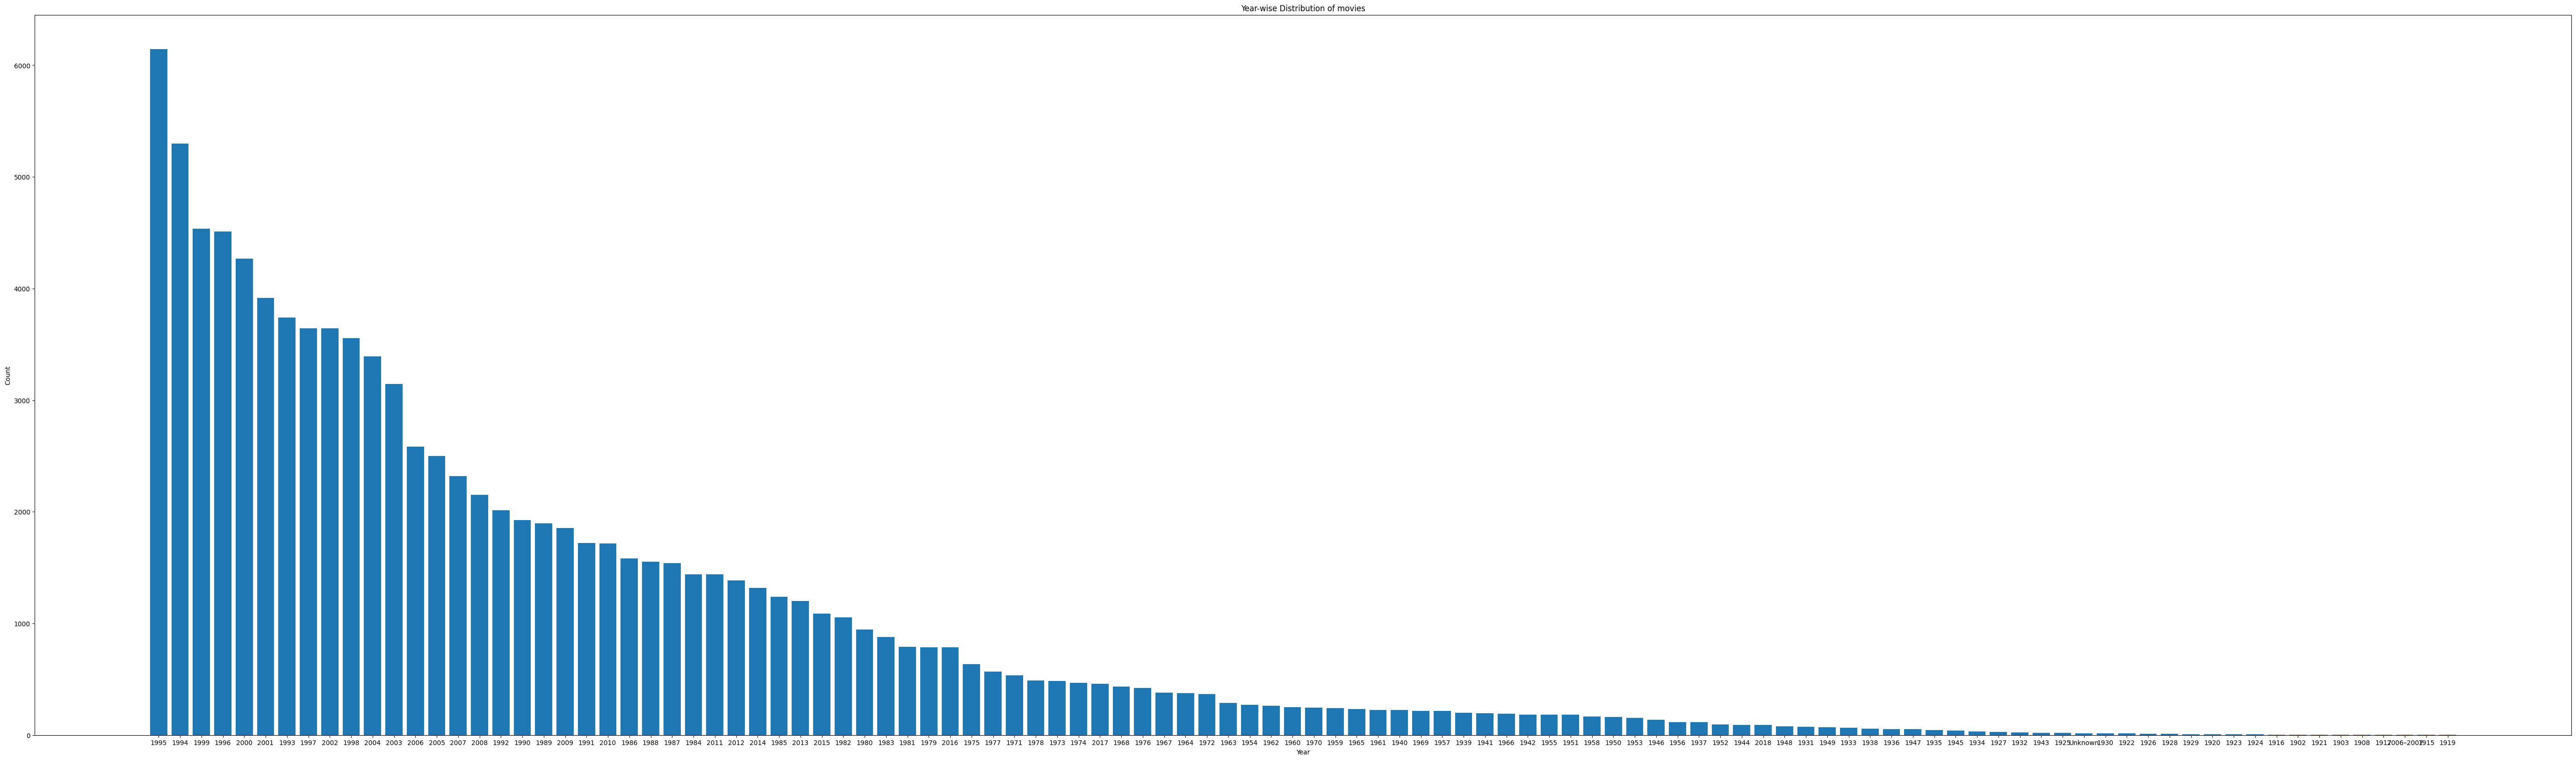

In [ ]:
plt.figure(figsize=(70,20))
plt.title('Year-wise Distribution of movies')
plt.xlabel('Year')
plt.ylabel('Count')
plt.bar(year_released_count['year'],year_released_count['count'])
plt.show()

### **Preprocessing Movie Title using NLP techniques**

Natural Language Processing (NLP) is a subfield of artificial intelligence (AI). It helps machines process and understand the human language so that they can automatically perform repetitive tasks.

In natural language processing, human language is separated into fragments so that the grammatical structure of sentences and the meaning of words can be analyzed and understood in context. This helps computers read and understand spoken or written text in the same way as humans.

Here are a few fundamental NLP pre-processing tasks data scientists need to perform before NLP tools can make sense of human language:

* **Tokenization:** breaks down text into smaller semantic units or single clauses

* **Part-of-speech-tagging:** marking up words as nouns, verbs, adjectives, adverbs, pronouns, etc

* **Stemming and lemmatization:** standardizing words by reducing them to their root forms

* **Stop word removal:** filtering out common words that add little or no unique information, for example, prepositions and articles (at, to, a, the).

Only then can NLP tools transform text into something a machine can understand.

In the project, we worked on tokenization to breakdown the titles into list of words.

In [ ]:
import gensim

In [ ]:
import nltk
from nltk import sent_tokenize,word_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
title_corpus = list(df['title'])

In [ ]:
words = []

for sent in title_corpus:
  words.append(word_tokenize(sent.lower()))

In [ ]:
words

[['toy', 'story'],
 ['grumpier', 'old', 'men'],
 ['heat'],
 ['seven', '(', 'a.k.a', '.', 'se7en', ')'],
 ['usual', 'suspects', ',', 'the'],
 ['from', 'dusk', 'till', 'dawn'],
 ['bottle', 'rocket'],
 ['braveheart'],
 ['rob', 'roy'],
 ['canadian', 'bacon'],
 ['desperado'],
 ['billy', 'madison'],
 ['clerks'],
 ['dumb', '&', 'dumber', '(', 'dumb', 'and', 'dumber', ')'],
 ['ed', 'wood'],
 ['star', 'wars', ':', 'episode', 'iv', '-', 'a', 'new', 'hope'],
 ['pulp', 'fiction'],
 ['stargate'],
 ['tommy', 'boy'],
 ['forrest', 'gump'],
 ['jungle', 'book', ',', 'the'],
 ['mask', ',', 'the'],
 ['blown', 'away'],
 ['dazed', 'and', 'confused'],
 ['fugitive', ',', 'the'],
 ['jurassic', 'park'],
 ['mrs.', 'doubtfire'],
 ['schindler', "'s", 'list'],
 ['so', 'i', 'married', 'an', 'axe', 'murderer'],
 ['three', 'musketeers', ',', 'the'],
 ['tombstone'],
 ['dances', 'with', 'wolves'],
 ['silence', 'of', 'the', 'lambs', ',', 'the'],
 ['pinocchio'],
 ['fargo'],
 ['mission', ':', 'impossible'],
 ['james', 'and

In [ ]:
len(words)

100836

In [ ]:
import gensim

#### **Word2Vec Embedding using gensim**

Word2Vec is a state of the art algorithm to generate fixed length distributed vector representation of all the words in huge corpus. The effectiveness of Word2Vec is due two reasons —

* The use of fixed size vectors which means the vector size does not depend on the number of unique words in the corpus.
* Incorporating semantic information in the vector representations. Word2Vec vectors are highly efficient at grouping similar words together. The algorithm can make strong estimates based on the position of the word in the corpus.

Word2Vec can be implemented in two architectures — Continuous Bag of Words(CBOW) and Skip-Gram. The main idea of Word2Vec revolves around predicting the context (outside) words based on a center word or vice versa in a fixed size window.


For example , consider the following part of a corpus :

…. possibility of having a dream come true that makes life interesting…..

In the above example, with a fixed window of 3, let “come” be the center word and “dream” and “true” be the outside words. CBOW predicts the probability of dream and true given the center word come and Skip-Gram predicts the center word come, given the context words dream and true.


* **CBOW** — Predicts the center word based on the context (outside) words.
* **Skip-Gram** — Predicts the context words based on the center word


In [ ]:
#Train the word2vec model from scratch using gensim

title_model = gensim.models.Word2Vec(words, vector_size=100,epochs=100,min_count=0)

In [ ]:
#To get all the vocabulary

title_model.wv.index_to_key

['the',
 ',',
 'of',
 ':',
 '(',
 ')',
 'and',
 "'s",
 'a',
 '.',
 'in',
 '2',
 'to',
 'a.k.a',
 'star',
 'man',
 '&',
 'ii',
 '-',
 'day',
 'wars',
 'for',
 'episode',
 'american',
 'with',
 'i',
 'men',
 'story',
 'harry',
 'part',
 'dead',
 'lost',
 'me',
 'on',
 'you',
 'king',
 '!',
 'big',
 'potter',
 'life',
 'love',
 'black',
 'back',
 'lord',
 'world',
 'last',
 'no',
 'batman',
 'trek',
 'iii',
 'rings',
 'jones',
 'it',
 'die',
 'good',
 'movie',
 '3',
 'from',
 'my',
 'new',
 'hard',
 'city',
 'little',
 'about',
 'return',
 'indiana',
 'who',
 'park',
 'first',
 'dark',
 'one',
 'matrix',
 'la',
 'seven',
 'terminator',
 'days',
 'beauty',
 'ghost',
 'future',
 'kill',
 'club',
 'raiders',
 'ark',
 'v',
 'night',
 'girl',
 'at',
 'toy',
 'up',
 'x-men',
 '?',
 'dragon',
 'mr.',
 'two',
 'iv',
 'godfather',
 'jurassic',
 'knight',
 'monty',
 'monkeys',
 'christmas',
 'fiction',
 'mission',
 'de',
 'red',
 'bride',
 'show',
 'time',
 'space',
 'true',
 'run',
 'forrest',
 'g

In [ ]:
# To get the number of words in corpus used for training the model

title_model.corpus_count

100836

In [ ]:
#Number of epochs for which the model was trained

title_model.epochs

100

In [ ]:
from tqdm import tqdm

In [ ]:
len(title_model.wv.index_to_key)

9373

In [ ]:
title_model.wv['iii']

array([ 3.1938987 ,  0.9822978 ,  1.0233957 , -1.1661257 , -0.85954726,
       -2.1046648 , -2.6592696 ,  1.0769566 ,  4.1704655 , -0.11658434,
        0.37261465,  1.7003018 , -0.57748777, -0.22723442,  2.399768  ,
        0.50682837, -1.5861778 ,  2.017345  , -1.9639798 , -0.7330398 ,
        1.7231566 , -3.2456279 , -0.5638346 ,  0.17084342, -3.324776  ,
       -1.6163218 , -0.1620671 , -0.588603  , -0.38675335,  0.6397245 ,
        1.3475747 , -0.4586444 , -0.55059093, -2.5723882 ,  1.1635047 ,
        3.7143338 , -0.94476545,  1.5935802 , -2.4819098 , -1.5618447 ,
        3.4353461 ,  1.1695418 , -1.5899726 ,  0.24293265, -3.0202181 ,
       -1.5198507 , -1.8828121 , -0.97696257,  1.05548   ,  2.5769193 ,
        3.9651825 ,  2.0472457 ,  2.9641495 , -2.5523357 ,  0.78638285,
        0.7366675 , -1.0504326 , -0.99361086, -0.30273423, -0.9815073 ,
       -0.20371851,  1.3807762 , -2.4087398 , -1.4406071 ,  0.4308567 ,
       -1.9864926 , -2.5224617 ,  0.32560372, -1.638317  , -4.78

#### Average Word2Vec on the `title` Column

In [ ]:
def avg_word2vec(doc):
  return np.mean([title_model.wv[word] for word in doc if word.lower() in title_model.wv.index_to_key],axis=0)

In [ ]:
#Applying tqdm to every sentence

X = []

for i in tqdm(range(len(words))):
  X.append(avg_word2vec(words[i]))

 44%|████▍     | 44531/100836 [00:03<00:04, 12638.42it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 100836/100836 [00:09<00:00, 10755.46it/s]


In [ ]:
len(X)

100836

### **Handling Missing Data**

There were some rows with missing information about the title after converting them into the vectors. These rows were removed from the dataset.

In [ ]:
#Getting the indices where the data is missing by comparing the shape of the vectors present in the list.
c=0
for x in X:
  if x.shape != X[0].shape:
    print(c)
  c+=1

44661
64590
79226
85511


In [ ]:
X[44661]

nan

Storing the missing indices in the list and trying to handle those rows.

In [ ]:
empty_list = [44661,64590,79226,85511]
for i in empty_list:
  print(df.iloc[i])

userId                    318
movieId                171495
title                        
year_released         Unknown
Film-Noir                   0
Action                      0
Documentary                 0
War                         0
Animation                   0
Comedy                      0
Musical                     0
(no genres listed)          1
Fantasy                     0
Thriller                    0
Horror                      0
Drama                       0
Children                    0
IMAX                        0
Mystery                     0
Western                     0
Romance                     0
Sci-Fi                      0
Adventure                   0
Crime                       0
Name: 44661, dtype: object
userId                    462
movieId                162414
title                        
year_released         Unknown
Film-Noir                   0
Action                      0
Documentary                 0
War                         0
Animation    

In [ ]:
#Removing the vectors with 'Nan' from the list
x=0
for i in empty_list:
  X.pop(i-x)
  x+=1

Removing the list of indices with missing title information from the main DataFrame

In [ ]:
df = df.drop(empty_list)

Removing the list of indices with missing title information from the target variable to match the sizes of the dataframe and target variable.

In [ ]:
y = y.drop(empty_list)

Checking for missing values in the list of vectors

In [ ]:
c=0
for x in X:
  if x.shape != X[0].shape:
    print(c)
  c+=1

In [ ]:
X[267]

array([ 8.1605269e-03,  9.2511885e-03, -2.8555084e-03,  2.4703646e-03,
        6.9198012e-03,  8.0074640e-03, -6.6630077e-03, -8.9419009e-03,
        9.5040584e-03, -1.3782703e-03, -1.3020503e-03,  4.2432966e-03,
        3.4004985e-03,  6.0701775e-03, -9.5604789e-03,  7.5917565e-03,
        2.7187371e-03, -2.2516954e-03,  6.9176531e-03, -8.7858917e-04,
        9.5909117e-03,  1.1679364e-03, -3.7230218e-03, -2.4714493e-03,
       -6.1802994e-03, -4.4720937e-03,  2.3948371e-03,  5.1678373e-03,
       -9.4175152e-03,  6.0838903e-03, -8.1864954e-04, -6.3026072e-03,
        4.3673362e-03, -9.0186819e-03, -5.7276771e-03, -8.3105266e-03,
       -1.8003702e-04, -3.1291342e-03,  6.1927927e-03, -3.5415245e-03,
        3.7801361e-03, -1.9112611e-03,  6.9541549e-03, -4.8690476e-03,
        6.6953395e-03, -2.7903663e-03,  5.4911376e-05,  6.4618589e-04,
       -3.7704539e-03, -4.8268614e-03, -3.8702131e-04,  1.6556025e-03,
        9.2381947e-03, -4.7927215e-03,  1.3652444e-04, -4.6182298e-03,
      

Converting the list of vectors obtained for each title into a numpy array

In [ ]:
X_new = np.array(X)

In [ ]:
X_new.shape

(100832, 100)

In [ ]:
df.shape

(100832, 24)

### **Dimensionality Reduction using PCA**

Using PCA we project the data points along the principle components which maximizes the co-variance of the the data points along the axis on which it is projected. The principle component is the Eigen Vector of the Co-Variance Matrix of the Datapoints.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_title_pca = pca.fit_transform(X_new)

In [ ]:
X_title_pca

array([[ 2.098485  ,  1.887826  ],
       [ 2.0389576 , -0.7780608 ],
       [-1.1520805 ,  0.94117546],
       ...,
       [-1.3692294 ,  3.8810606 ],
       [-2.3662174 , -1.1342474 ],
       [-2.4509797 ,  0.6457624 ]], dtype=float32)

In [ ]:
df.shape

(100832, 24)

Storing the vector i.e., array that contains the title embedded as a vector after reducing the dimensions into `movie_df` Dataframe.

In [ ]:
movie_df = pd.DataFrame(X_title_pca, columns = ['Movie_feature_1','Movie_feature_2'])

In [ ]:
df

,userId,movieId,title,year_released,Film-Noir,Action,Documentary,War,Animation,Comedy,...,Horror,Drama,Children,IMAX,Mystery,Western,Romance,Sci-Fi,Adventure,Crime
0,1,1,Toy Story,1995,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,1,3,Grumpier Old Men,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,6,Heat,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,47,Seven (a.k.a. Se7en),1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,50,"Usual Suspects, The",1995,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,610,81834,Harry Potter and the Deathly Hallows: Part 1,2010,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9996,610,87232,X-Men: First Class,2011,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9997,610,91500,The Hunger Games,2012,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
9998,610,91658,"Girl with the Dragon Tattoo, The",2011,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
movie_df

,Movie_feature_1,Movie_feature_2
0,2.098485,1.887826
1,2.038958,-0.778061
2,-1.152081,0.941175
3,1.665119,-6.991100
4,-3.951624,-0.866326
...,...,...
100827,0.089953,1.609542
100828,-0.328367,2.525920
100829,-1.369229,3.881061
100830,-2.366217,-1.134247


### **Concatenating the main dataframe with movie dataframe**

`add_cols function` appends the columns of the `movie_df` into `df`.

In [ ]:
def add_cols(feature):
  df[feature] = movie_df[feature]

In [ ]:
for feat in movie_df.columns:
  add_cols(feat)

In [ ]:
df

,userId,movieId,title,year_released,Film-Noir,Action,Documentary,War,Animation,Comedy,...,Children,IMAX,Mystery,Western,Romance,Sci-Fi,Adventure,Crime,Movie_feature_1,Movie_feature_2
0,1,1,Toy Story,1995,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,2.098485,1.887826
1,1,3,Grumpier Old Men,1995,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,2.038958,-0.778061
2,1,6,Heat,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,-1.152081,0.941175
3,1,47,Seven (a.k.a. Se7en),1995,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.665119,-6.991100
4,1,50,"Usual Suspects, The",1995,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,-3.951624,-0.866326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,610,81834,Harry Potter and the Deathly Hallows: Part 1,2010,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,-0.186452,-3.405374
9996,610,87232,X-Men: First Class,2011,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,-1.818996,4.818935
9997,610,91500,The Hunger Games,2012,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,2.548757,3.786467
9998,610,91658,"Girl with the Dragon Tattoo, The",2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.070472,0.538380


Dropping the `title` column as we have already converted it into a vector and added it to the `df`.

In [ ]:
df = df.drop(['title'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100832 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100832 non-null  int64  
 1   movieId             100832 non-null  int64  
 2   year_released       100832 non-null  object 
 3   Film-Noir           100832 non-null  int64  
 4   Action              100832 non-null  int64  
 5   Documentary         100832 non-null  int64  
 6   War                 100832 non-null  int64  
 7   Animation           100832 non-null  int64  
 8   Comedy              100832 non-null  int64  
 9   Musical             100832 non-null  int64  
 10  (no genres listed)  100832 non-null  int64  
 11  Fantasy             100832 non-null  int64  
 12  Thriller            100832 non-null  int64  
 13  Horror              100832 non-null  int64  
 14  Drama               100832 non-null  int64  
 15  Children            100832 non-null 

In [ ]:
#List that stores the columns that are categorical
cat_columns = [cols for cols in df.columns if df[cols].dtype=='object']

In [ ]:
cat_columns

['year_released']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100832 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100832 non-null  int64  
 1   movieId             100832 non-null  int64  
 2   year_released       100832 non-null  object 
 3   Film-Noir           100832 non-null  int64  
 4   Action              100832 non-null  int64  
 5   Documentary         100832 non-null  int64  
 6   War                 100832 non-null  int64  
 7   Animation           100832 non-null  int64  
 8   Comedy              100832 non-null  int64  
 9   Musical             100832 non-null  int64  
 10  (no genres listed)  100832 non-null  int64  
 11  Fantasy             100832 non-null  int64  
 12  Thriller            100832 non-null  int64  
 13  Horror              100832 non-null  int64  
 14  Drama               100832 non-null  int64  
 15  Children            100832 non-null 

Converting the `userId` into a categorical feature as assigning a number to user would make the model to differentiate between user by considering the user with higher user id as an significant user, and one with lower user id as a less significant user.

In [ ]:
df['userId'] = df['userId'].astype('object')

Dropping `movieId` as we have included the titles for the movie.

In [ ]:
df = df.drop(['movieId'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100832 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100832 non-null  object 
 1   year_released       100832 non-null  object 
 2   Film-Noir           100832 non-null  int64  
 3   Action              100832 non-null  int64  
 4   Documentary         100832 non-null  int64  
 5   War                 100832 non-null  int64  
 6   Animation           100832 non-null  int64  
 7   Comedy              100832 non-null  int64  
 8   Musical             100832 non-null  int64  
 9   (no genres listed)  100832 non-null  int64  
 10  Fantasy             100832 non-null  int64  
 11  Thriller            100832 non-null  int64  
 12  Horror              100832 non-null  int64  
 13  Drama               100832 non-null  int64  
 14  Children            100832 non-null  int64  
 15  IMAX                100832 non-null 

### **One-hot Encoding**

We cannot provide our model with strings as it only understands numbers so we need to convert them into the numbers in the following way:

    'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']

    Color_Blue  Color_Green  Color_Red
    0            0          1
    0            1          0
    1            0          0
    0            0          1
    0            1          0

In [ ]:
df = pd.get_dummies(df,drop_first=True)

<ipython-input-96-5b8a27156a35>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df,drop_first=True)


In [ ]:
df

,Film-Noir,Action,Documentary,War,Animation,Comedy,Musical,(no genres listed),Fantasy,Thriller,...,year_released_2010,year_released_2011,year_released_2012,year_released_2013,year_released_2014,year_released_2015,year_released_2016,year_released_2017,year_released_2018,year_released_Unknown
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9996,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
y

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
90831    4.0
90832    5.0
90833    5.0
90834    5.0
90835    3.0
Name: rating, Length: 90832, dtype: float64

## **3. Model Training**

### **Segregating the Dataset**
We have to segrate the dataset for the final predictions as we concatenated them in the beginning for the ease of pre-processing.

In [ ]:
X_main_train = df.iloc[:90832]
X_main_train

,Film-Noir,Action,Documentary,War,Animation,Comedy,Musical,(no genres listed),Fantasy,Thriller,...,year_released_2010,year_released_2011,year_released_2012,year_released_2013,year_released_2014,year_released_2015,year_released_2016,year_released_2017,year_released_2018,year_released_Unknown
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90831,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
90832,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
90833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
90834,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_final_test = df.iloc[90832:]
X_final_test

,Film-Noir,Action,Documentary,War,Animation,Comedy,Musical,(no genres listed),Fantasy,Thriller,...,year_released_2010,year_released_2011,year_released_2012,year_released_2013,year_released_2014,year_released_2015,year_released_2016,year_released_2017,year_released_2018,year_released_Unknown
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9996,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


### **Splitting training and Validation Data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_main_train,y,test_size=0.2)

### **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

#Intializing the model
LinearRegressor = LinearRegression()

#Fitting the model
LinearRegressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predictions on the validation set
LR_predict = LinearRegressor.predict(X_test)

Calculating the MSE for linear regression

In [ ]:
from sklearn.metrics import mean_squared_error

LR_mse = mean_squared_error(y_test,LR_predict)

In [ ]:
LR_mse

0.8411230560533516

### **Random Forest Regressor Model**

A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

Every decision tree has high variance, but when we combine all of them in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data, and hence the output doesn’t depend on one decision tree but on multiple decision trees.

In the case of a regression problem, the final output is the mean of all the outputs. This part is called Aggregation.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Intializing the RandomForestRegressor object to fit the model
RF_regr = RandomForestRegressor()

#Fitting the model
RF_regr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
#Predicitons on validation set
RF_pred = RF_regr.predict(X_test)

In [ ]:
RF_pred

array([3.35 , 3.865, 3.14 , ..., 2.635, 3.03 , 4.295])

### **Artificial Neural Network Regression Model**


In order to define a neural network that consists of a large number of artificial neurons, which are termed units arranged in a sequence of layers. Artificial Neural Network primarily consists of three layers:

  * **Input Layer:**
  As the name suggests, it accepts inputs in several different formats provided by the programmer.

  * **Hidden Layer:**
  The hidden layer presents in-between input and output layers. It performs all the calculations to find hidden features and patterns.

  * **Output Layer:**
  The input goes through a series of transformations using the hidden layer, which finally results in output that is conveyed using this layer.

  The artificial neural network takes input and computes the weighted sum of the inputs and includes a bias.




A RegressionNeuralNetwork object is a trained, feedforward, and fully connected neural network for regression. The first fully connected layer of the neural network has a connection from the network input (predictor data X), and each subsequent layer has a connection from the previous layer. Each fully connected layer multiplies the input by a weight matrix (LayerWeights) and then adds a bias vector (LayerBiases). An activation function follows each fully connected layer, excluding the last (Activations and OutputLayerActivation). The final fully connected layer produces the network's output, namely predicted response values. For more information, see Neural Network Structure.


For the project, we have used tensorflow for training the artificial neural network.

In [ ]:
#importing the libraries for using neural networks
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Activation,Dropout,InputLayer
from tensorflow.keras.optimizers import Adam

In [ ]:
X_val,X_test_1,y_val,y_test_1 = train_test_split(X_test,y_test,test_size=0.4)

In [ ]:
Model = Sequential([
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dropout(0.1),
    Dense(16,activation='relu'),
    Dense(16,activation='relu'),
    Dropout(0.1),
    Dense(1,activation='linear')
])

Model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mse"]
              )

Model.fit(X_train,y_train,validation_data=[X_val,y_val],epochs=10)

Epoch 1/10
2271/2271 [==============================] - 17s 5ms/step - loss: 0.8885 - mse: 1.3620 - val_loss: 0.7332 - val_mse: 0.8738
Epoch 2/10
2271/2271 [==============================] - 12s 5ms/step - loss: 0.7675 - mse: 0.9799 - val_loss: 0.7451 - val_mse: 0.8786
Epoch 3/10
2271/2271 [==============================] - 11s 5ms/step - loss: 0.7366 - mse: 0.9163 - val_loss: 0.7014 - val_mse: 0.8254
Epoch 4/10
2271/2271 [==============================] - 11s 5ms/step - loss: 0.7145 - mse: 0.8695 - val_loss: 0.6924 - val_mse: 0.8195
Epoch 5/10
2271/2271 [==============================] - 10s 4ms/step - loss: 0.6946 - mse: 0.8311 - val_loss: 0.6877 - val_mse: 0.8094
Epoch 6/10
2271/2271 [==============================] - 11s 5ms/step - loss: 0.6772 - mse: 0.7994 - val_loss: 0.6909 - val_mse: 0.8073
Epoch 7/10
2271/2271 [==============================] - 11s 5ms/step - loss: 0.6637 - mse: 0.7766 - val_loss: 0.6864 - val_mse: 0.8052
Epoch 8/10
2271/2271 [==============================] -

## **4. Predictions on final data**

### **Function to round-off the predicted ratings**

In [ ]:
import math

#Checks for the decimal part of a predicted rating before rounding off
def decimal_rating(rating):

  #Storing fractional part and integral part into 2 variables
  frac,whole = math.modf(rating)
  #Condition for less than and equal to 0.3
  if frac<=0.3:
    frac = 0
  #Condition for less than and equal to 0.5 but greater than 0.3
  elif frac>0.3 and frac<=0.5:
    frac = 0.5
  #Condition for less than and equal to 0.7 but greater than 0.5
  elif frac>0.5 and frac<=0.7:
    frac = 0.5
  #Condition if none of the above satifies
  else:
    frac = 1.0

  new_rating = whole + frac

  # Return the rounded off ratings
  return new_rating


### **Final predictions on Linear Regression Model**

**Result:**`89`

In [ ]:
y_pred = LinearRegressor.predict(X_final_test)

In [ ]:
list_predictions = y_pred.tolist()
rounded_list_predictions = [decimal_rating(x) for x in list_predictions]
print(rounded_list_predictions)

[4.5, 4.5, 4.0, 4.5, 5.0, 4.5, 4.0, 4.0, 4.0, 4.0, 4.5, 4.5, 4.5, 4.5, 4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 4.0, 4.5, 4.0, 3.5, 3.5, 3.0, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 3.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 3.5, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 4.0, 3.5, 3.0, 3.5, 3.0, 3.0, 3.5, 3.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 3.0, 3.5, 3.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5, 3.5, 4.0, 3.5, 4.0, 3.0, 3.5, 3.0, 3.0, 3.5, 3.0, 3.5, 3.5, 3.5, 3.5, 3.0, 3.5, 3.5, 3.0, 3.0, 3.5, 4.0, 4.0, 3.5, 3.5, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.5, 4.0, 4.0, 4.5, 4.5, 4.0, 4.5, 4.5, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 3.5, 3.5, 3.5, 4.0, 3.5, 3.5, 3.5,

### **Final Predictions on Random Forest Regressor Model**

**Result:**`88`

In [ ]:
y_pred_rf = RF_regr.predict(X_final_test)

In [ ]:
list_predictions_rf = y_pred_rf.tolist()
rounded_list_predictions_rf = [decimal_rating(x) for x in list_predictions_rf]
print(rounded_list_predictions_rf)

[3.5, 3.5, 3.5, 3.0, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 4.5, 3.5, 3.5, 3.5, 3.5, 5.0, 3.0, 3.5, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.5, 3.0, 3.0, 3.0, 3.5, 4.0, 4.0, 4.0, 3.5, 3.5, 3.0, 4.5, 3.5, 4.0, 3.5, 3.5, 3.0, 3.0, 3.0, 3.5, 4.0, 3.0, 3.5, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.5, 3.5, 3.0, 3.0, 3.5, 4.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.0, 3.5, 2.5, 4.0, 4.0, 4.0, 4.0, 3.0, 3.5, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 3.0, 3.5, 5.0, 4.5, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 3.0, 4.0, 4.0, 4.5, 3.5, 3.5, 3.0, 4.5, 3.5, 4.0, 3.5, 4.0, 3.0, 3.5, 4.0, 3.5, 3.5, 4.0, 4.0, 4.5, 4.0, 3.5, 3.0, 3.5, 4.0, 3.5, 3.0, 4.5, 3.0, 4.0, 3.5, 3.0, 3.5, 3.5, 4.0, 2.5, 4.0, 3.5, 3.0, 4.0, 4.0, 4.0, 3.5, 3.5, 3.0, 3.5, 4.0, 3.0, 3.0, 4.0, 4.5, 4.0, 3.5, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 3.5, 3.5, 4.5, 5.0, 4.5, 4.0, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.5, 3.0, 4.5, 3.5, 3.5, 3.5,

### **Final Predictions for ANN Regressor Model**

**Result:**`93`

In [ ]:
list_predictions_ann = list(Model.predict(X_final_test))
rounded_list_predictions_ann = [decimal_rating(x) for x in list_predictions_ann]
print(rounded_list_predictions_ann)

313/313 [==============================] - 2s 5ms/step
[4.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.5, 3.0, 3.0, 3.5, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.5, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.5, 4.0, 4.5, 4.0, 4.0, 4.5, 4.0, 3.0, 3.0, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 3.0, 3.5, 3.5, 4.0, 3.0, 4.0, 4.0, 3.5, 3.5, 3.0, 4.0, 2.5, 4.0, 4.0, 4.0, 3.5, 3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.5, 3.0, 4.0, 3.0, 4.0, 3.5, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.5, 4.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.5, 4.0, 4.0, 3.0, 3.0, 4.0, 4.5, 4.0, 4.0, 4.0, 3.5, 3.0, 4.0, 4.0, 4.0, 3.5, 4.0, 3.5, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.5, 3.0, 3.0, 3.5, 3.0, 3.0, 3.5, 3.5, 3.5, 4.0, 3.0, 3.0, 4.0, 3.5, 3.5, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.5, 2.5, 4.0, 3.0, 3.0, 3.0, 3.5, 3.5, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.5, 4.0, 3.5, 4.0, 3.5, 3.5, 3.5, 3.0, 4.0, 4.0, 4.0, 4.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 5.0, 4.0, 4.0, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.0, 4.0,

## **5. Conclusion**

Results from leaderboard:

* **Linear Regression:**`89`
* **ANN Regression:**`88`
* **Random Forest Regression:**`93`

In conclusion, the best result was obtained using the `Artificial Neural Network`. Hence, that is the best model we have obtained through our project. But, considering the results of `Linear Regression` it is more suitable model because of simiplicity, and results obtained by `ANN` and `Linear Regression` being too close.